<a href="https://colab.research.google.com/github/lkhok22/ML-FinalProject-Walmart-Recruiting---Store-Sales-Forecasting/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
import math
import os
import wandb
import zipfile
from google.colab import drive



# Mount Google Drive
drive.mount('/content/drive')

# Create output directory
os.makedirs('outputs', exist_ok=True)

# Initialize wandb in offline mode
wandb.login(key="adabe744fa21b54da1e969e6aa8131a48f615f08")
wandb.init(project="walmart-sales-forecasting", name="dataExploration")

# Mount Google Drive and Extract Data
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/ML-FinalProject/data.zip'
extract_dir = '/content/data'
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith('.zip'):
            nested_zip_path = os.path.join(root, file)
            with zipfile.ZipFile(nested_zip_path, 'r') as nested_zip:
                nested_zip.extractall(root)
            os.remove(nested_zip_path)
print(os.listdir(extract_dir))
# Load
train = pd.read_csv(os.path.join(extract_dir, 'train.csv'))
stores = pd.read_csv(os.path.join(extract_dir, 'stores.csv'))
features = pd.read_csv(os.path.join(extract_dir, 'features.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lkhok22 (lkhok22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['train.csv', 'features.csv', 'sampleSubmission.csv', 'test.csv', 'stores.csv']


#Merge datasets by Store, Date and IsHoliday

In [4]:
df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left').merge(stores, on='Store', how='left')

In [5]:
print(df.shape)
df.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [6]:
print(df['Store'].nunique())
print(df['Dept'].nunique())

45
81


#Weekly sales by store and dept

In [7]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

/tmp/ipython-input-7-2014498793.py:1: FutureWarning: The provided callable <function mean at 0x7a6bd9b120c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


#Dropping negative weekly sales

In [8]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


0.3% dropped

In [9]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

# Convert to datetime

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [11]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

,Weekly_Sales
month,
1,14182.239153
2,16048.701191
3,15464.817698
4,15696.435193
5,15845.556200
6,16397.605478
7,15905.472425
8,16113.800069
9,15147.216063


In [12]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

,Weekly_Sales
year,
2010,16318.648285
2011,16007.797985
2012,15748.265005


#From the graph, it is seen that 2011 has lower sales than 2010 generally
#2012 has no information about November and December,Despite of 2012 has no last two months sales, it's mean is near to 2010

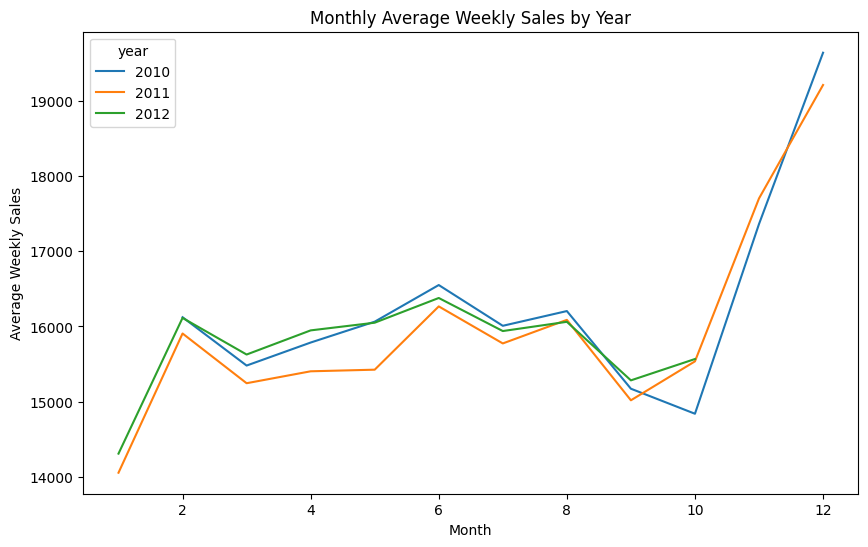

In [13]:
# 1. Monthly sales by year (line plot)
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")

fig1, ax1 = plt.subplots(figsize=(10, 6))
monthly_sales.plot(ax=ax1)
ax1.set_title("Monthly Average Weekly Sales by Year")
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Weekly Sales")
plt.show()
wandb.log({"Monthly Sales Line Plot": wandb.Image(fig1)})
plt.close(fig1)

# Barplot of Weekly Sales by Month

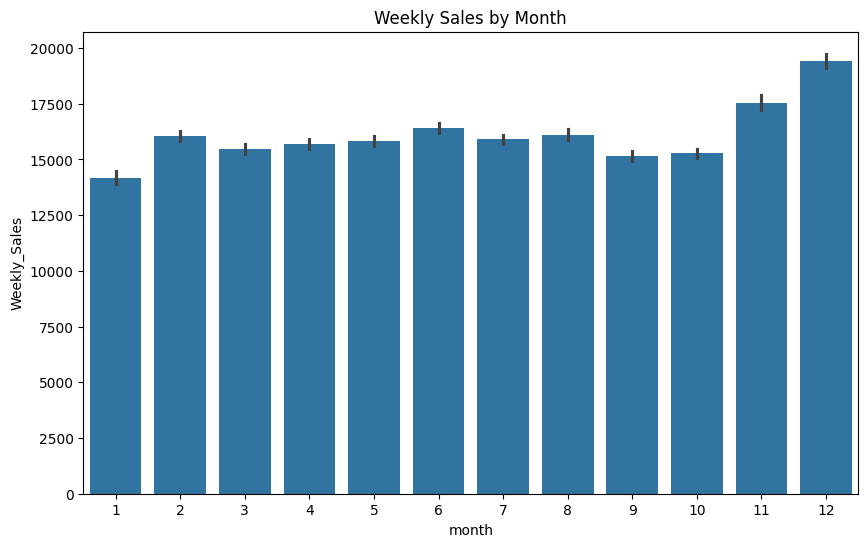

In [14]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(x='month', y='Weekly_Sales', data=df, ax=ax2)
ax2.set_title("Weekly Sales by Month")
plt.show()
wandb.log({"Monthly Sales Barplot": wandb.Image(fig2)})
plt.close(fig2)


# Histogram of Weekly Sales

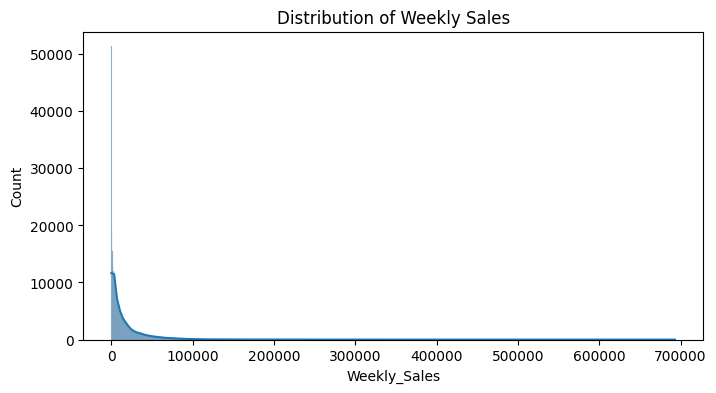

In [15]:
fig1, ax1 = plt.subplots(figsize=(8, 4))
sns.histplot(df['Weekly_Sales'], kde=True, ax=ax1)
ax1.set_title('Distribution of Weekly Sales')
plt.show()  # Show in notebook output
wandb.log({"Weekly Sales Distribution": wandb.Image(fig1)})
plt.close(fig1)

# plot of Weekly Sales by *Store*

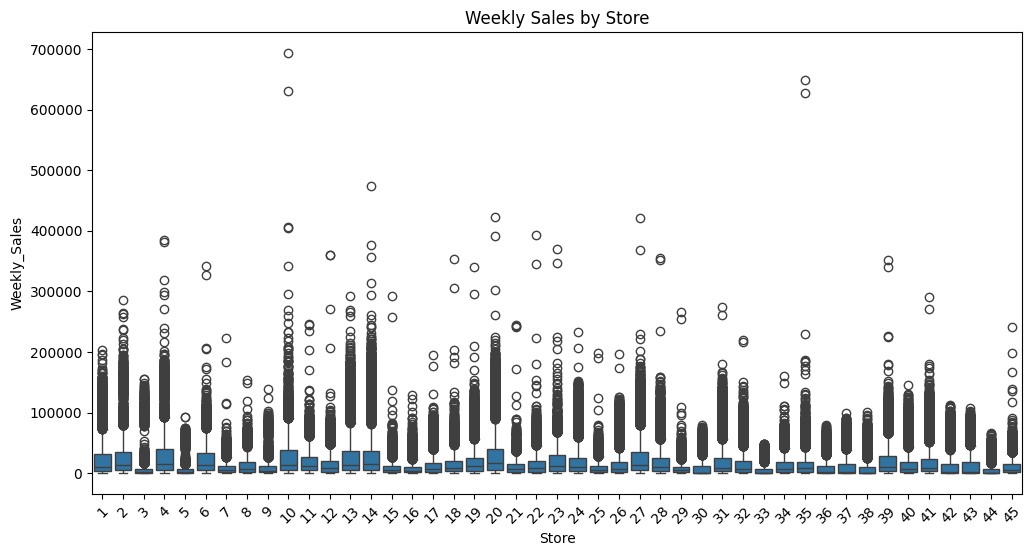

In [16]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df, ax=ax2)
ax2.set_title('Weekly Sales by Store')
ax2.tick_params(axis='x', rotation=45)
plt.show()
wandb.log({"Weekly Sales by Store": wandb.Image(fig2)})
plt.close(fig2)

# Barplot of Average Weekly Sales by Store

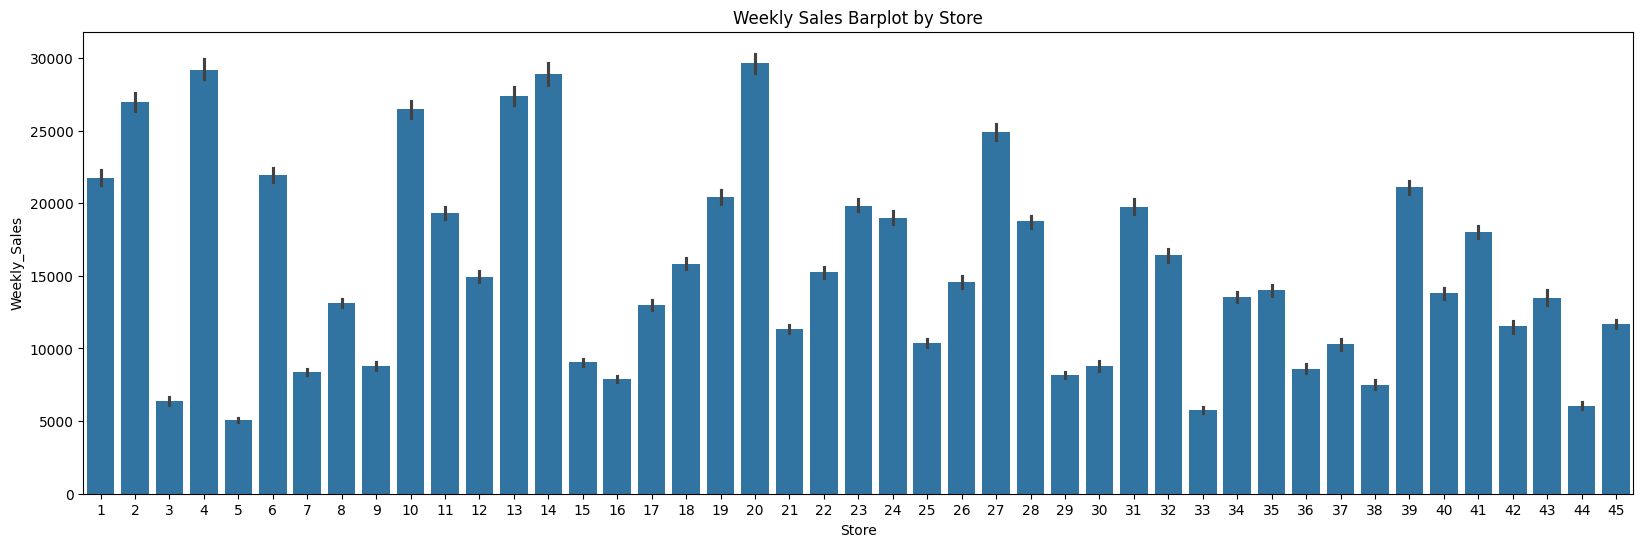

In [17]:

# 3. Barplot of Weekly Sales by Store
fig3, ax3 = plt.subplots(figsize=(20, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df, ax=ax3)
ax3.set_title('Weekly Sales Barplot by Store')
plt.show()
wandb.log({"Store Barplot": wandb.Image(fig3)})
plt.close(fig3)

# Plot of Weekly Sales by Department

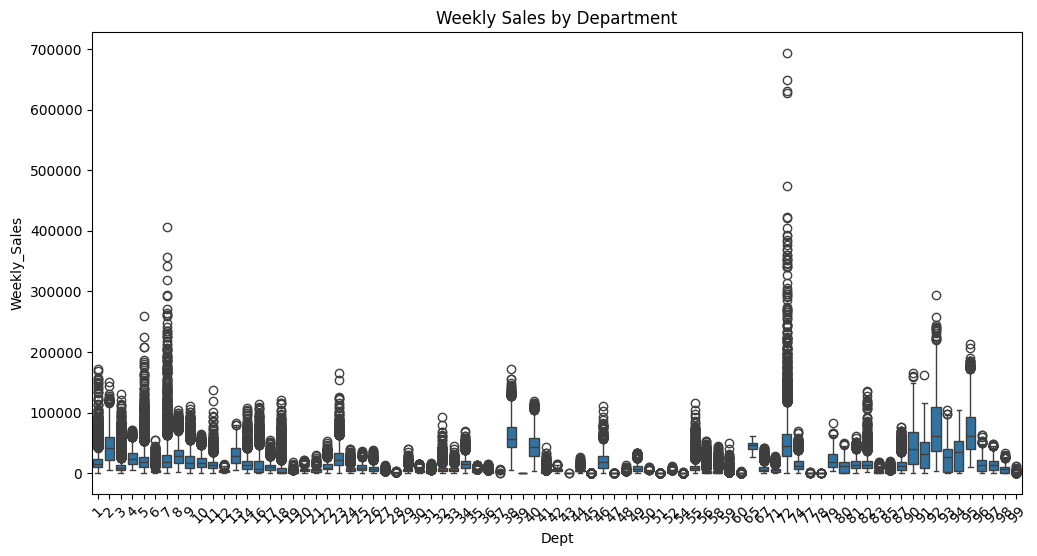

In [18]:
fig4, ax4 = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Dept', y='Weekly_Sales', data=df, ax=ax4)
ax4.set_title('Weekly Sales by Department')
ax4.tick_params(axis='x', rotation=45)
plt.show()
wandb.log({"Weekly Sales by Department": wandb.Image(fig4)})
plt.close(fig4)

# Barplot of Average Weekly Sales by Department

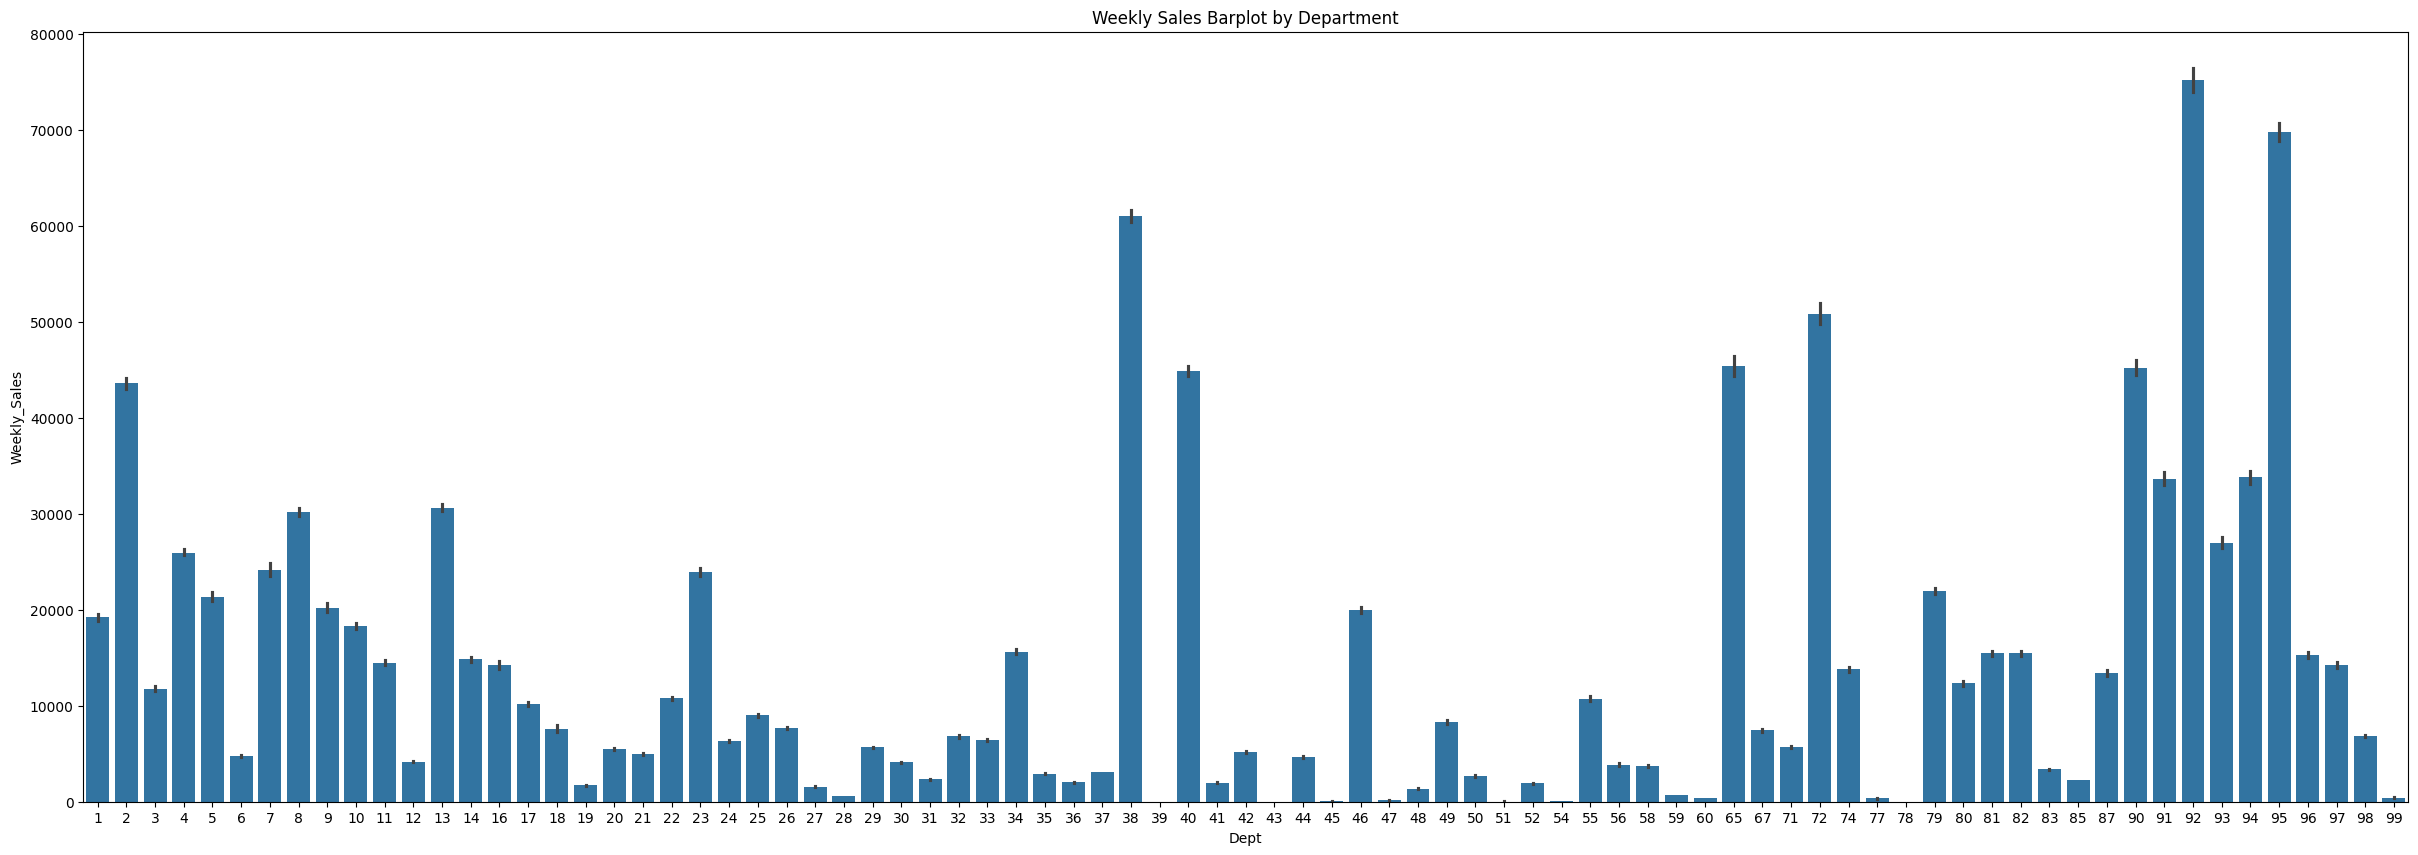

In [19]:
# 5. Barplot of Weekly Sales by Department
fig5, ax5 = plt.subplots(figsize=(30, 10))
sns.barplot(x='Dept', y='Weekly_Sales', data=df, ax=ax5)
ax5.set_title('Weekly Sales Barplot by Department')
plt.show()
wandb.log({"Department Barplot": wandb.Image(fig5)})
plt.close(fig5)

# Bar plot of average Weekly Sales by Store Type

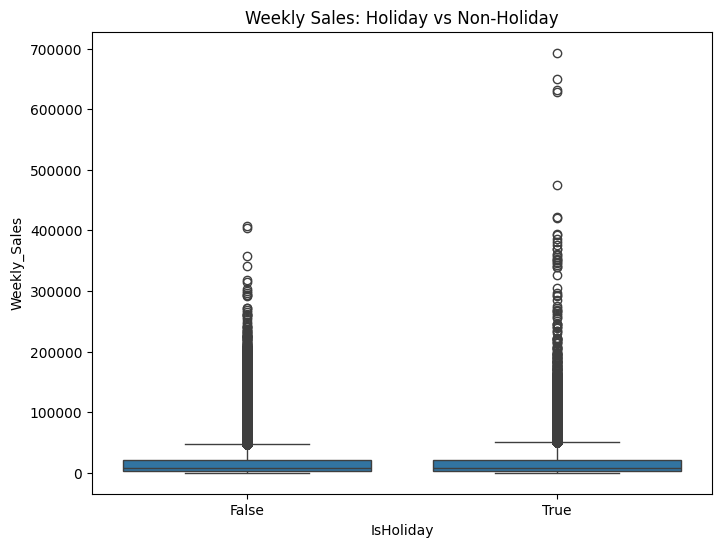

In [20]:
fig6, ax6 = plt.subplots(figsize=(8, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=ax6)
ax6.set_title('Weekly Sales: Holiday vs Non-Holiday')
plt.show()
wandb.log({"Sales by Holiday": wandb.Image(fig6)})
plt.close(fig6)

# Plot of Weekly Sales by Holiday

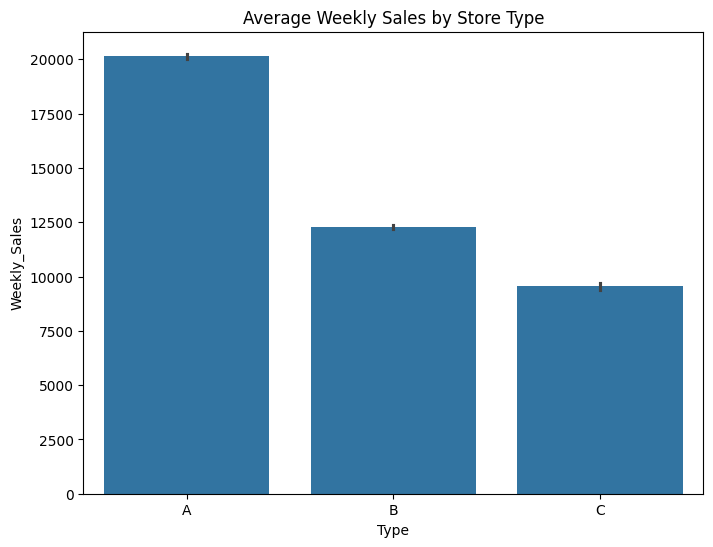

In [21]:
fig9, ax9 = plt.subplots(figsize=(8, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=df, ax=ax9)
ax9.set_title('Average Weekly Sales by Store Type')
plt.show()
wandb.log({"Sales by Store Type": wandb.Image(fig9)})
plt.close(fig9)

# Correlation heatmap for Markdowns and Weekly Sales

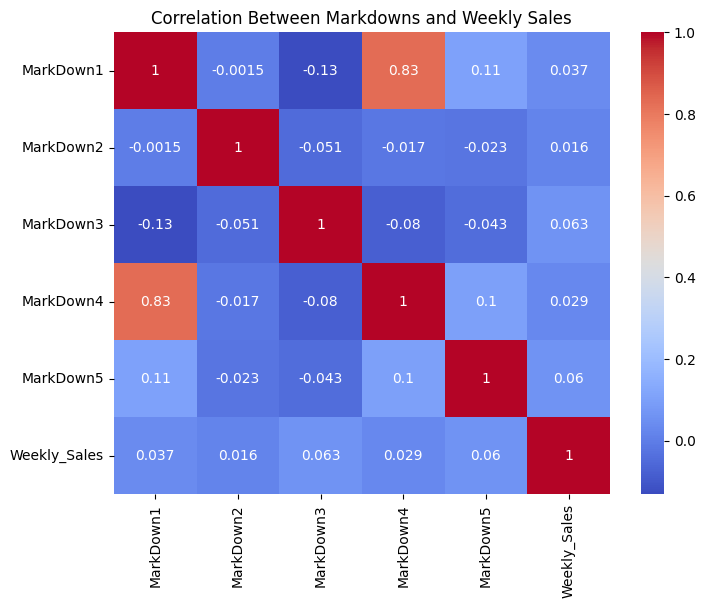

In [22]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']
markdown_sales = df[markdown_cols].dropna()
fig7, ax7 = plt.subplots(figsize=(8, 6))
sns.heatmap(markdown_sales.corr(), annot=True, cmap='coolwarm', ax=ax7)
ax7.set_title('Correlation Between Markdowns and Weekly Sales')
plt.show()
wandb.log({"Markdown-Sales Correlation": wandb.Image(fig7)})
plt.close(fig7)
markdown_sales.corr()['Weekly_Sales'].to_csv('outputs/markdown_sales_corr.csv')

# Correlation heatmap for external features

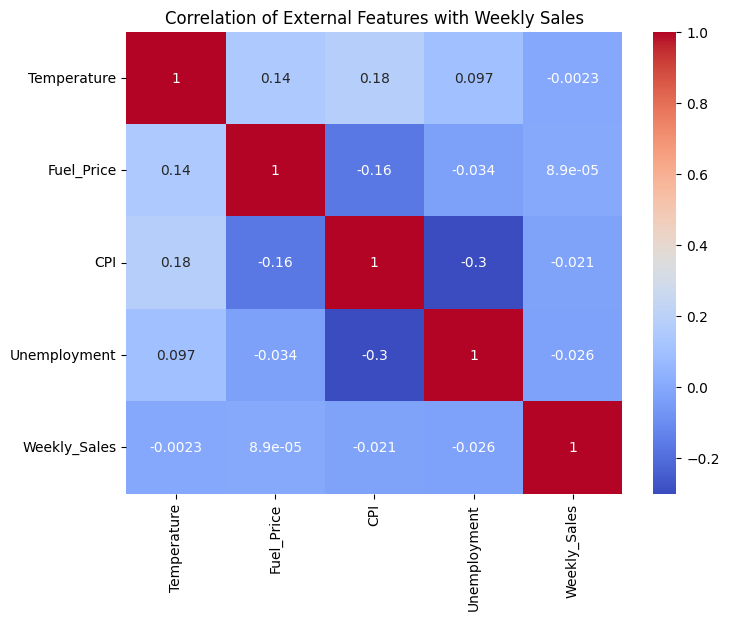

In [23]:
external_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
fig8, ax8 = plt.subplots(figsize=(8, 6))
sns.heatmap(df[external_cols].corr(), annot=True, cmap='coolwarm', ax=ax8)
ax8.set_title('Correlation of External Features with Weekly Sales')
plt.show()
wandb.log({"External Features Correlation": wandb.Image(fig8)})
plt.close(fig8)
df[external_cols].corr()['Weekly_Sales'].to_csv('outputs/external_features_corr.csv')

# Scatter plot of Weekly Sales vs Store Size

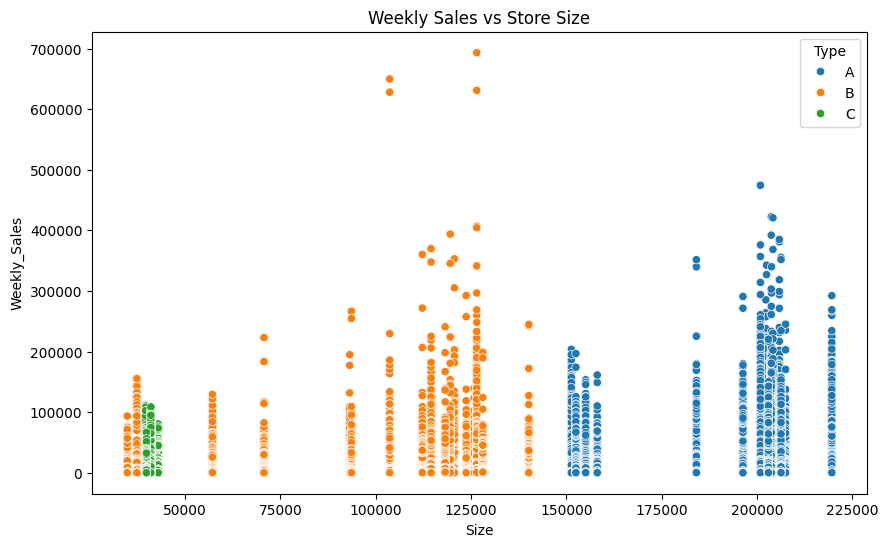

In [24]:
fig10, ax10 = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=df, ax=ax10)
ax10.set_title('Weekly Sales vs Store Size')
plt.show()
wandb.log({"Sales vs Store Size": wandb.Image(fig10)})
plt.close(fig10)

# Line plot of Weekly Sales over time

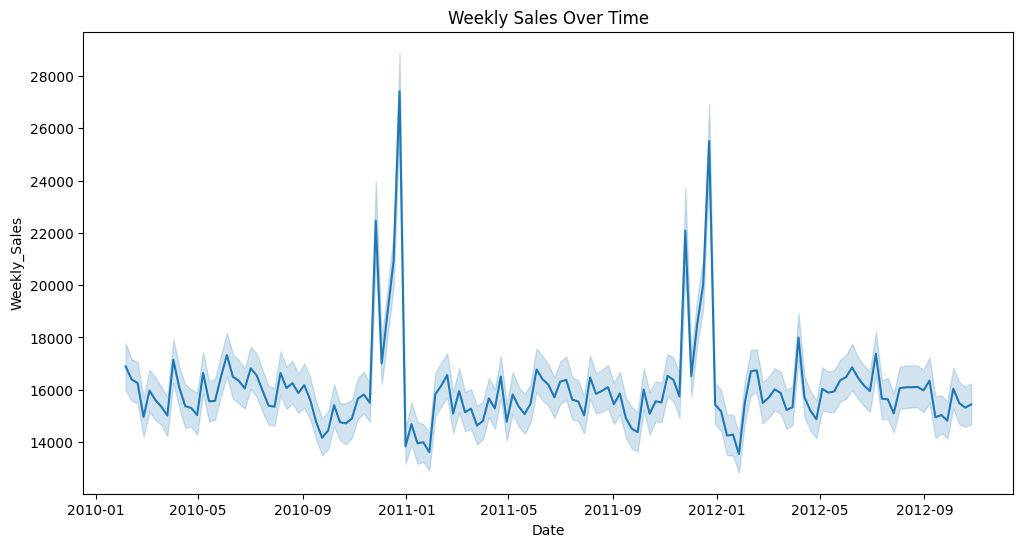

In [25]:
fig11, ax11 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df, ax=ax11)
ax11.set_title('Weekly Sales Over Time')
plt.show()
wandb.log({"Sales Over Time": wandb.Image(fig11)})
plt.close(fig11)

# Fuel Price, CPI , Unemployment , Temperature Effects

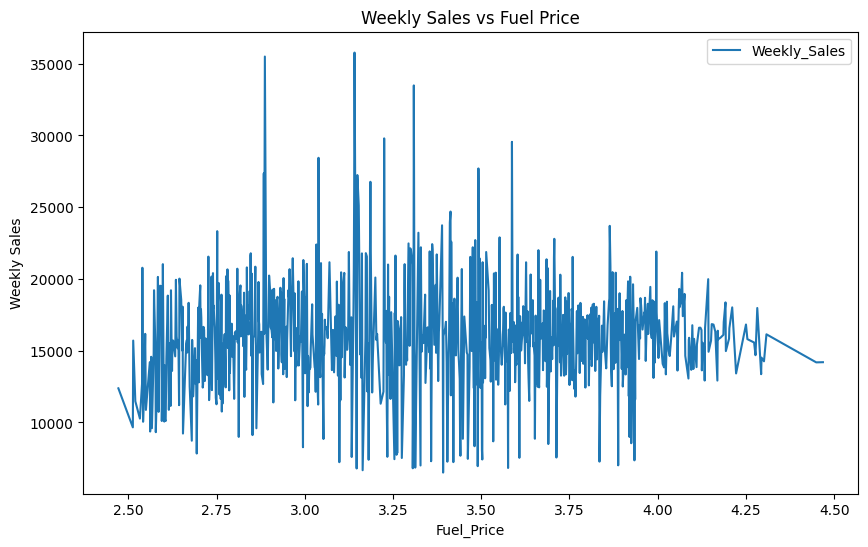

In [26]:
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price")

fig1, ax1 = plt.subplots(figsize=(10, 6))
fuel_price.plot(ax=ax1)
ax1.set_title("Weekly Sales vs Fuel Price")
ax1.set_ylabel("Weekly Sales")
plt.show()
wandb.log({"Fuel Price vs Sales": wandb.Image(fig1)})
plt.close(fig1)

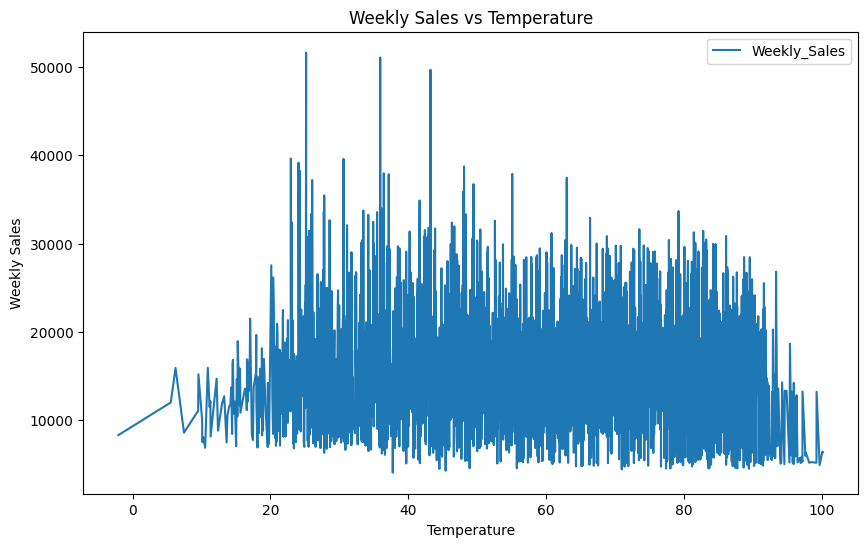

In [27]:
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")

fig2, ax2 = plt.subplots(figsize=(10, 6))
temp.plot(ax=ax2)
ax2.set_title("Weekly Sales vs Temperature")
ax2.set_ylabel("Weekly Sales")
plt.show()
wandb.log({"Temperature vs Sales": wandb.Image(fig2)})
plt.close(fig2)

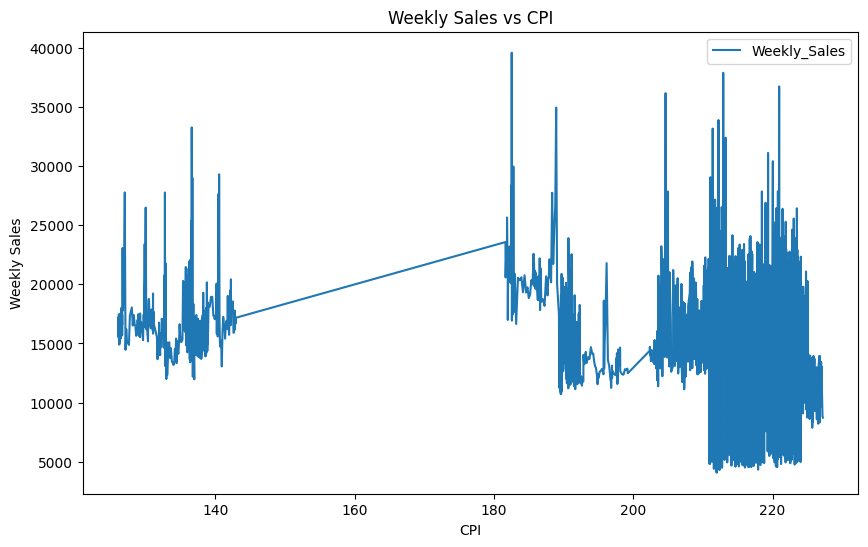

In [28]:
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")

fig3, ax3 = plt.subplots(figsize=(10, 6))
CPI.plot(ax=ax3)
ax3.set_title("Weekly Sales vs CPI")
ax3.set_ylabel("Weekly Sales")
plt.show()
wandb.log({"CPI vs Sales": wandb.Image(fig3)})
plt.close(fig3)

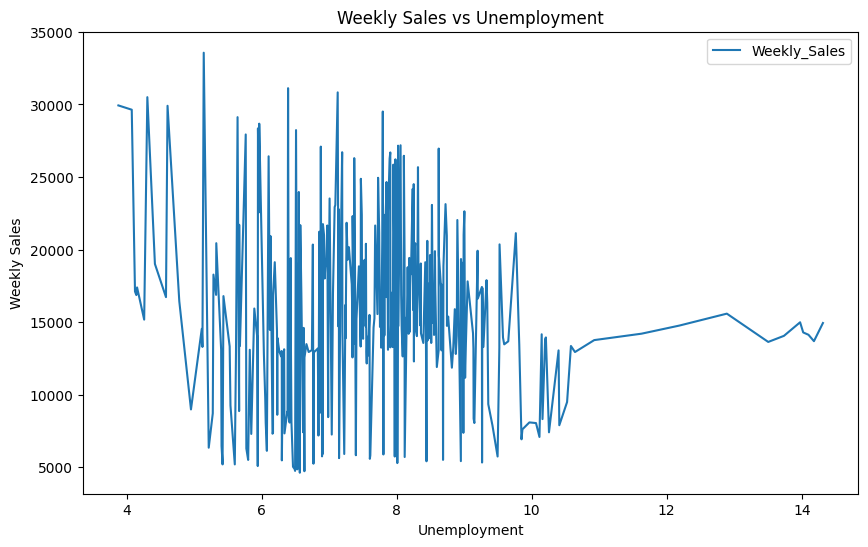

In [29]:
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")

fig4, ax4 = plt.subplots(figsize=(10, 6))
unemployment.plot(ax=ax4)
ax4.set_title("Weekly Sales vs Unemployment")
ax4.set_ylabel("Weekly Sales")
plt.show()
wandb.log({"Unemployment vs Sales": wandb.Image(fig4)})
plt.close(fig4)

# From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [30]:
# 12. Log exploration summary
summary = {
    "Num Stores": df['Store'].nunique(),
    "Num Departments": df['Dept'].nunique(),
    "Avg Weekly Sales": df['Weekly_Sales'].mean(),
    "Holiday Sales Avg": df[df['IsHoliday'] == True]['Weekly_Sales'].mean(),
    "Non-Holiday Sales Avg": df[df['IsHoliday'] == False]['Weekly_Sales'].mean()
}
wandb.log({"Exploration Summary": summary})
pd.DataFrame([summary]).to_csv('outputs/exploration_summary.csv')

In [31]:
# Finish the wandb run
wandb.finish()